In [17]:
import numpy as np
import pandas as pd

# Sample data for a feature
feature_values = np.array([23, 4, 55, 2, -33, 33, 2, -14, 4])

# Number of bins
max_bins = 4

# Generate quantile-based bin edges
quantiles = np.linspace(0, 1, max_bins + 1)  # [0, 0.25, 0.5, 0.75, 1]
bin_edges = np.quantile(feature_values, quantiles)

# Display the results
print("Feature values:", feature_values)
print("Quantiles:", quantiles)
print("Bin edges:", bin_edges)


Feature values: [ 23   4  55   2 -33  33   2 -14   4]
Quantiles: [0.   0.25 0.5  0.75 1.  ]
Bin edges: [-33.   2.   4.  23.  55.]


In [3]:
for a in {1: 2}.keys():
    print(a)

1


In [4]:
a = (1, 3)

In [8]:
a[1]

3

all_combinations = list(itertools.product(*[zip([None] + values, values + [None]) for values in splits]))

In [10]:
for a in range(1, 3):
    print(a)

1
2


In [11]:
import numpy as np

dim = 3  # Example dimensionality
size = 4  # Example size for each dimension

# Create an array of ones, zeros, or random values
array = np.ones([size] * dim)

# Or, for zeros:
# array = np.zeros([size] * dim)

# Or, for random values:
# array = np.random.rand(*([size] * dim))

print(array)
print(array.shape)  # Prints the shape of the array (size, size, size)



[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
(4, 4, 4)


In [16]:
import math

max_bins = 256
dim = 3



In [17]:
round(math.log(max_bins) / math.log(dim))

5

In [20]:
np.array(np.arange(5))

array([0, 1, 2, 3, 4])

In [48]:
a = {'1': 3}

In [24]:
for x in a:
    print(x)

1


In [30]:
def find_closest_factors(x, n):
    import math
    
    # Take the n-th root of x
    base = x ** (1 / n)
    
    # Split into integers close to the n-th root
    lower = math.floor(base)
    upper = math.ceil(base)
    
    # Start with all lower values
    factors = [lower] * n
    
    # Adjust the factors to make the product closer to x
    product = lower ** n
    i = 0
    while product < x and i < n:
        factors[i] = upper
        product = math.prod(factors)
        i += 1
    
    return factors

# Example usage:
x = 256
n = 8
result = find_closest_factors(x, n)
print("Factors:", result)
print("Product:", math.prod(result))  # The product of the factors


Factors: [2, 2, 2, 2, 2, 2, 2, 2]
Product: 256


In [33]:
for x, y in a.items():
    print(x, y)

1 3


In [64]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
np.quantile(np.arange(10), q=np.linspace(0, 1, 5))

array([0.  , 2.25, 4.5 , 6.75, 9.  ])

In [26]:
import pandas as pd
import itertools

def get_region_indices(df, feature_splits):
    """
    Identify indices of dataset points in each region defined by feature splits.

    Args:
        df (pd.DataFrame): Dataset with features as columns.
        feature_splits (dict): Dictionary where keys are feature names and values are split values.

    Returns:
        dict: A dictionary mapping region tuples to lists of indices.
    """
    # Generate region bounds using combinations of split values
    regions = {}
    features = list(feature_splits.keys())
    splits = [feature_splits[feature] for feature in features]
    
    # Generate all possible regions by taking product of split ranges
    all_combinations = list(itertools.product(*[
        zip([None] + values, values + [None]) for values in splits
    ]))
    
    # Iterate through each region definition
    for region in all_combinations:
        # Create boolean masks for the region
        region_conditions = []
        for i, (lower, upper) in enumerate(region):
            feature = features[i]
            if lower is not None:
                region_conditions.append(df[feature] > lower)
            if upper is not None:
                region_conditions.append(df[feature] <= upper)
        
        # Combine all conditions using logical AND
        if region_conditions:
            mask = region_conditions[0]
            for condition in region_conditions[1:]:
                mask = mask & condition
        else:
            mask = pd.Series(True, index=df.index)
        
        # Store indices of points in this region
        region_key = tuple(region)
        regions[region_key] = df[mask].index.tolist()
    
    return regions

# Example usage
df = pd.DataFrame({
    "feature1": [1, 2, 3, 4, 5],
    "feature2": [10, 20, 30, 40, 50]
})

feature_splits = {
    "feature1": [2, 4],
    "feature2": [15, 35]
}

result = get_region_indices(df, feature_splits)
for region, indices in result.items():
    print(f"Region: {region}, Indices: {indices}")


Region: ((None, 2), (None, 15)), Indices: [0]
Region: ((None, 2), (15, 35)), Indices: [1]
Region: ((None, 2), (35, None)), Indices: []
Region: ((2, 4), (None, 15)), Indices: []
Region: ((2, 4), (15, 35)), Indices: [2]
Region: ((2, 4), (35, None)), Indices: [3]
Region: ((4, None), (None, 15)), Indices: []
Region: ((4, None), (15, 35)), Indices: []
Region: ((4, None), (35, None)), Indices: [4]


In [33]:
a = [1, 2, 3, 4, 5]
a[1:-1]

[2, 3, 4]

In [27]:
# Example usage
df = pd.DataFrame({
    "feature1": np.random.uniform(0, 10, 100),
    "feature2": np.random.uniform(0, 20, 100)
})

feature_splits = {
    "feature1": [3, 7],
    "feature2": [5, 15]
}

result = get_region_indices(df, feature_splits)
for region, indices in result.items():
    print(f"Region: {region}, Indices: {indices}")

Region: ((None, 3), (None, 5)), Indices: [28, 67, 80, 85]
Region: ((None, 3), (5, 15)), Indices: [1, 5, 6, 8, 14, 16, 23, 39, 41, 43, 47, 53, 54, 57, 62, 64, 65, 70, 72, 73, 75, 81, 82, 84, 86, 89, 94, 97]
Region: ((None, 3), (15, None)), Indices: [3, 20, 32, 40, 44, 60, 63, 78]
Region: ((3, 7), (None, 5)), Indices: [4, 25, 46, 48, 58, 66]
Region: ((3, 7), (5, 15)), Indices: [0, 2, 7, 11, 12, 17, 18, 21, 24, 27, 29, 30, 38, 42, 59, 71, 76, 77, 83, 90, 96]
Region: ((3, 7), (15, None)), Indices: [15, 26, 35, 36, 52, 56, 68, 74]
Region: ((7, None), (None, 5)), Indices: [9, 10, 31, 33, 37, 45, 49, 91, 98]
Region: ((7, None), (5, 15)), Indices: [13, 22, 51, 55, 61, 87, 88, 93, 95, 99]
Region: ((7, None), (15, None)), Indices: [19, 34, 50, 69, 79, 92]


In [38]:
a = np.arange(8)

In [39]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [40]:
b = np.arange(8)

In [41]:
a += b

In [42]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [37]:
np.sum(a[[]])

np.int64(0)

In [79]:
a.reshape([2, 2, 2])

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def visualize_splits(df, feature_splits):
    """
    Visualize the dataset and the regions defined by feature splits.
    
    Args:
        df (pd.DataFrame): The dataset.
        feature_splits (dict): Dictionary of feature splits.
    """
    # Plotting only the first two features for simplicity
    features = list(feature_splits.keys())[:2]
    if len(features) < 2:
        print("Visualization requires at least two features.")
        return
    
    feature1, feature2 = features
    
    # Scatter plot of the original data
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature1], df[feature2], c="blue", label="Data points", alpha=0.6)
    
    # Add vertical lines for splits in feature1
    for split in feature_splits[feature1]:
        plt.axvline(x=split, color='red', linestyle='--', label=f"{feature1} split={split}")
    
    # Add horizontal lines for splits in feature2
    for split in feature_splits[feature2]:
        plt.axhline(y=split, color='green', linestyle='--', label=f"{feature2} split={split}")
    
    # Add labels and legend
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title("Feature Space and Splits")
    plt.legend(loc="upper right")
    plt.grid(alpha=0.3)
    plt.show()

def visualize_regions(df, feature_splits):
    """
    Visualize data points in their respective regions after splitting.
    
    Args:
        df (pd.DataFrame): The dataset.
        feature_splits (dict): Dictionary of feature splits.
    """
    # Generate regions
    regions = get_region_indices(df, feature_splits)
    
    # Plotting only the first two features for simplicity
    features = list(feature_splits.keys())[:2]
    if len(features) < 2:
        print("Visualization requires at least two features.")
        return
    
    feature1, feature2 = features
    colors = plt.cm.get_cmap("tab10", len(regions))  # Generate colors for each region
    
    plt.figure(figsize=(8, 6))
    for i, (region, indices) in enumerate(regions.items()):
        region_points = df.iloc[indices]
        plt.scatter(region_points[feature1], region_points[feature2], 
                    label=f"Region {i+1}: {region}", alpha=0.6, color=colors(i))
    
    # Add labels and legend
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title("Data Points in Regions")
    plt.legend(loc="upper right", fontsize=8)
    plt.grid(alpha=0.3)
    plt.show()




In [140]:
a = [[-4.34147719, -0.13850982,  1.19986035,  5.60841185], [-3.7173166 , -0.75548933,  5.44201867], [-4.26981582,  0.65349059,  4.72404577], [-5.81420332,  0.165713  ,  4.60566863], [-2.96176943,  0.5837432 ,  6.03679289]]

In [147]:
all_combinations = list(itertools.product(*[
    zip([None] + values, values + [None]) for values in a
]))

In [143]:
features = ['feature1', 'feature2', 'feature3']
feature_splits = {feature: splits for feature, splits in zip(features, a)}


In [144]:
feature_splits

{'feature1': [-4.34147719, -0.13850982, 1.19986035, 5.60841185],
 'feature2': [-3.7173166, -0.75548933, 5.44201867],
 'feature3': [-4.26981582, 0.65349059, 4.72404577]}

Region: ((None, 1), (None, 1)), Indices: [0]
Region: ((None, 1), (1, 15)), Indices: []
Region: ((None, 1), (15, 30)), Indices: []
Region: ((None, 1), (30, None)), Indices: []
Region: ((1, 7), (None, 1)), Indices: []
Region: ((1, 7), (1, 15)), Indices: []
Region: ((1, 7), (15, 30)), Indices: [1]
Region: ((1, 7), (30, None)), Indices: []
Region: ((7, 9), (None, 1)), Indices: []
Region: ((7, 9), (1, 15)), Indices: []
Region: ((7, 9), (15, 30)), Indices: []
Region: ((7, 9), (30, None)), Indices: []
Region: ((9, None), (None, 1)), Indices: []
Region: ((9, None), (1, 15)), Indices: []
Region: ((9, None), (15, 30)), Indices: []
Region: ((9, None), (30, None)), Indices: []


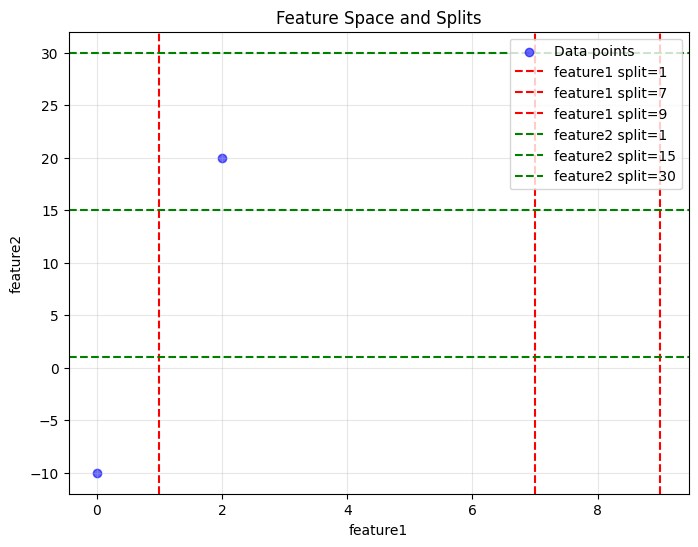

C:\Users\PC\AppData\Local\Temp\ipykernel_11432\1286388893.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(regions))  # Generate colors for each region


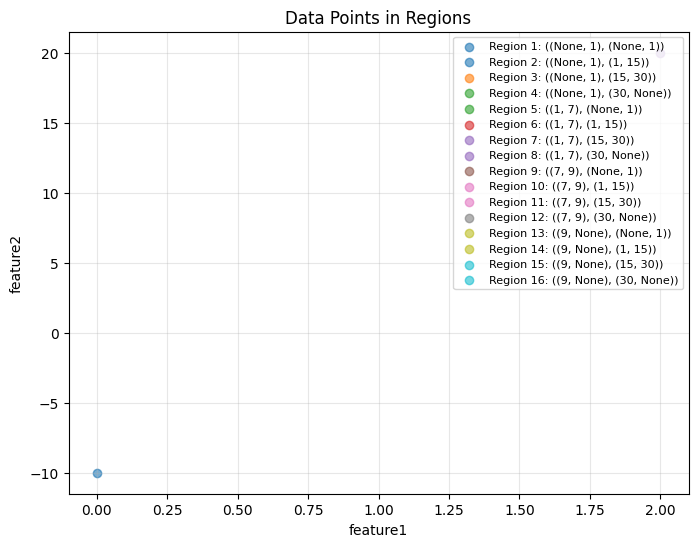

In [32]:
# # Example usage
# df = pd.DataFrame({
#     "feature1": np.random.uniform(-10, 10, 100),
#     "feature2": np.random.uniform(-10, 20, 100),
#     'feature3': np.random.uniform(-10, 20, 100)
# })

# Example usage
df = pd.DataFrame({
    "feature1": [0, 2],
    "feature2": [-10, 20]
})

feature_splits = {
    "feature1": [1, 7, 9],
    "feature2": [1, 15, 30]
}

result = get_region_indices(df, feature_splits)
for region, indices in result.items():
    print(f"Region: {region}, Indices: {indices}")

visualize_splits(df, feature_splits)
visualize_regions(df, feature_splits)

In [21]:
# Example usage
df = pd.DataFrame({
    "feature1": [1, 2],
    "feature2": [10, 20]
})

feature_splits = {
    "feature1": [2, 4],
    "feature2": [15, 35]
}

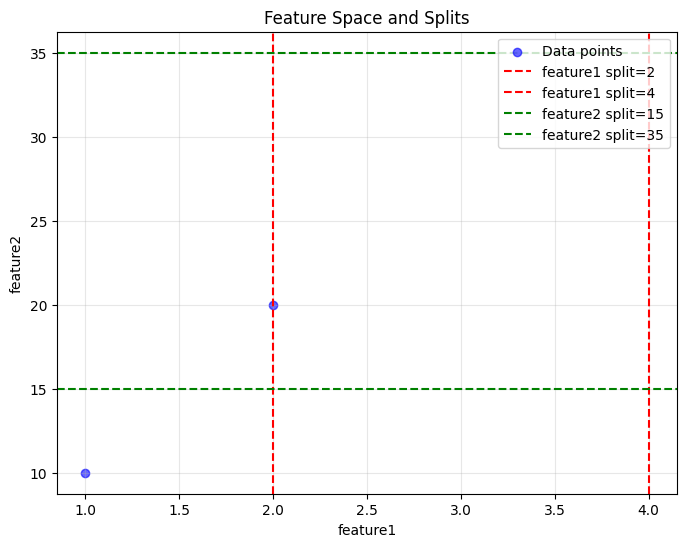

C:\Users\PC\AppData\Local\Temp\ipykernel_11432\1286388893.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(regions))  # Generate colors for each region


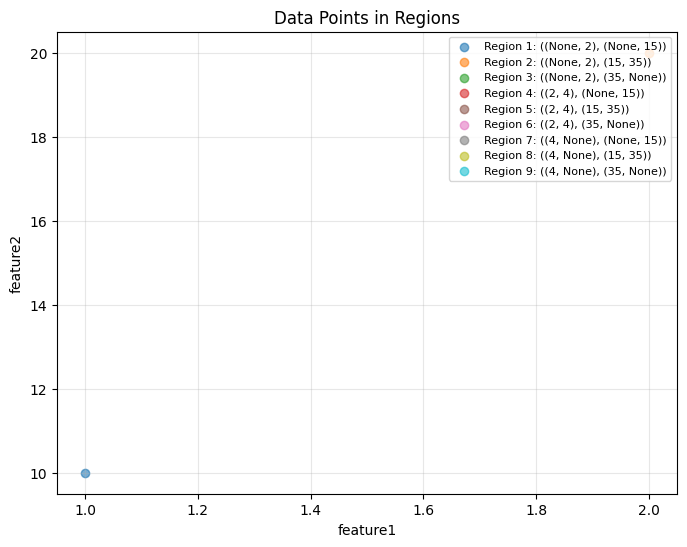

In [22]:
visualize_splits(df, feature_splits)
visualize_regions(df, feature_splits)

In [45]:
np.zeros([3, 5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [50]:
import numpy as np

# Example NumPy array
array = np.random.randint(0, 100, (4, 5, 6))  # A random 3D array of shape (4, 5, 6)

# Coordinate or address
coordinate = [1, 3, 5]  # Example coordinate

# Access the element using the coordinate
value = array[tuple(coordinate)]

print(f"Value at {coordinate}: {value}")


Value at [1, 3, 5]: 49


In [52]:
a = np.arange(6)

In [53]:
a

array([0, 1, 2, 3, 4, 5])

In [54]:
b = a[:5]

In [57]:
import numpy as np

# Example NumPy array
array = np.random.randint(0, 10, (4, 5, 6))  # A random 3D array of shape (4, 5, 6)

# Set of indices (example, list of tuples where each tuple is an index location)
indices = [(1, 3, 5), (0, 2, 4), (3, 4, 2)]

# Use tuple unpacking and advanced indexing to access elements at those indices
values = array[tuple(zip(*indices))]  # zip(*indices) will separate indices by dimensions

# Sum the values at those locations
sum_values = np.sum(values)

print(f"Sum of values at specified indices: {sum_values}")


Sum of values at specified indices: 17


In [60]:
array

array([[[9, 6, 5, 3, 5, 3],
        [6, 6, 4, 1, 4, 4],
        [7, 3, 3, 6, 5, 5],
        [3, 3, 6, 2, 1, 3],
        [3, 4, 3, 4, 0, 5]],

       [[5, 8, 2, 2, 7, 7],
        [9, 9, 7, 7, 9, 3],
        [7, 2, 3, 4, 7, 9],
        [3, 2, 6, 2, 7, 8],
        [5, 0, 0, 9, 6, 7]],

       [[8, 6, 2, 3, 5, 2],
        [5, 9, 8, 4, 5, 9],
        [4, 1, 0, 7, 8, 7],
        [9, 7, 0, 3, 2, 2],
        [9, 4, 0, 3, 0, 8]],

       [[3, 7, 5, 2, 9, 9],
        [3, 8, 4, 0, 1, 0],
        [3, 2, 0, 0, 9, 1],
        [8, 9, 0, 6, 9, 6],
        [9, 7, 4, 0, 8, 9]]], dtype=int32)

In [61]:
values

array([8, 5, 4], dtype=int32)

In [117]:
import numpy as np

# Example n-dimensional array (3D in this case)
array = np.random.randint(0, 10, (4, 6))

# The dimension along which to split (k-th dimension)
k = 1  # Let's say we want to split along the 2nd dimension (axis=1)

# We split it into two arrays along the k-th dimension
# np.split works when the size is divisible by the number of splits.
split_array = np.split(array, 2, axis=k)

# Show the result
print("Original shape:", array.shape)
print("Shape of first split:", split_array[0].shape)
print("Shape of second split:", split_array[1].shape)


Original shape: (4, 6)
Shape of first split: (4, 3)
Shape of second split: (4, 3)


In [118]:
array

array([[0, 1, 1, 4, 8, 1],
       [9, 6, 3, 0, 7, 0],
       [4, 2, 6, 9, 3, 6],
       [5, 5, 6, 5, 0, 1]], dtype=int32)

In [119]:
split_array

[array([[0, 1, 1],
        [9, 6, 3],
        [4, 2, 6],
        [5, 5, 6]], dtype=int32),
 array([[4, 8, 1],
        [0, 7, 0],
        [9, 3, 6],
        [5, 0, 1]], dtype=int32)]

In [125]:
import numpy as np

# Example n-dimensional array (3D in this case)
array = np.random.randint(0, 10, (4, 6))

# The dimension along which to split (k-th dimension)
k = 1  # Let's say we want to split along the 2nd dimension (axis=1)

# The index at which to split (xth index)
x = 2  # Split at index 2 along the 2nd dimension

# Use slicing to split the array at the x-th index
split1 = array.take(indices=range(0, x), axis=k)  # First part
split2 = array.take(indices=range(x, array.shape[k]), axis=k)  # Second part

# Show the result
print("Original shape:", array.shape)
print("Shape of first split:", split1.shape)
print("Shape of second split:", split2.shape)


Original shape: (4, 6)
Shape of first split: (4, 2)
Shape of second split: (4, 4)


In [126]:
array

array([[3, 2, 3, 7, 1, 4],
       [1, 4, 6, 6, 1, 9],
       [0, 0, 1, 3, 1, 6],
       [1, 3, 4, 1, 7, 9]], dtype=int32)

In [127]:
split1

array([[3, 2],
       [1, 4],
       [0, 0],
       [1, 3]], dtype=int32)

np.int64(14)

In [128]:
split2

array([[3, 7, 1, 4],
       [6, 6, 1, 9],
       [1, 3, 1, 6],
       [4, 1, 7, 9]], dtype=int32)

In [ ]:
import numpy as np
import pandas as pd
from math import e
from histogram import Histogram

class Node:
    
    '''
    A node object that is recursivly called within itslef to construct a regression tree. Based on Tianqi Chen's XGBoost 
    the internal gain used to find the optimal split value uses both the gradient and hessian. Also a weighted quantlie sketch 
    and optimal leaf values all follow Chen's description in "XGBoost: A Scalable Tree Boosting System" the only thing not 
    implemented in this version is sparsity aware fitting or the ability to handle NA values with a default direction.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a meaure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted skecth or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins

    Outputs
    --------------------------------------------------------------------------------------------------------------------
    A single tree object that will be used for gradient boosintg.
    '''

    def __init__(self, x, gradient, hessian, idxs, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1, 
                 depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
      
        self.x, self.gradient, self.hessian = x, gradient, hessian
        self.idxs = idxs 
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma  = gamma
        self.min_child_weight = min_child_weight
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.column_subsample = np.random.permutation(self.col_count)[:round(self.subsample_cols*self.col_count)]
        
        self.val = self.compute_gamma(self.gradient[self.idxs], self.hessian[self.idxs])
          
        self.score = float('-inf')
        self.find_varsplit()
        
        
    def compute_gamma(self, gradient, hessian):
        '''
        Calculates the optimal leaf value equation (5) in "XGBoost: A Scalable Tree Boosting System"
        '''
        return(-np.sum(gradient)/(np.sum(hessian) + self.lambda_))
        
    def find_varsplit(self):
        '''
        Scans through every column and calcuates the best split point.
        The node is then split at this point and two new nodes are created.
        Depth is only parameter to change as we have added a new layer to tre structure.
        If no split is better than the score initalised at the begining then no splits further splits are made
        '''
        for c in self.column_subsample: self.find_greedy_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[lhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        self.rhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[rhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        
    def find_greedy_split(self, var_idx):
        '''
         For a given feature greedily calculates the gain at each split.
         Globally updates the best score and split point if a better split point is found
        '''
        x = self.x[self.idxs, var_idx]
        
        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            
            lhs_indices = np.nonzero(x <= x[r])[0]
            rhs_indices = np.nonzero(x > x[r])[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue

            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def weighted_qauntile_sketch(self, var_idx):
        '''
        XGBOOST Mini-Version
        Yiyang "Joe" Zeng
        Is an approximation to the eact greedy approach faster for bigger datasets wher it is not feasible
        to calculate the gain at every split point. Uses equation (8) and (9) from "XGBoost: A Scalable Tree Boosting System"
        '''
        x = self.x[self.idxs, var_idx]
        hessian_ = self.hessian[self.idxs]
        df = pd.DataFrame({'feature':x,'hess':hessian_})
        
        df.sort_values(by=['feature'], ascending = True, inplace = True)
        hess_sum = df['hess'].sum() 
        df['rank'] = df.apply(lambda x : (1/hess_sum)*sum(df[df['feature'] < x['feature']]['hess']), axis=1)
        
        for row in range(df.shape[0]-1):
            # look at the current rank and the next ran
            rk_sk_j, rk_sk_j_1 = df['rank'].iloc[row:row+2]
            diff = abs(rk_sk_j - rk_sk_j_1)
            if(diff >= self.eps):
                continue
                
            split_value = (df['rank'].iloc[row+1] + df['rank'].iloc[row])/2
            lhs = x <= split_value
            rhs = x > split_value
            
            lhs_indices = np.nonzero(x <= split_value)[0]
            rhs_indices = np.nonzero(x > split_value)[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue
                
            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value
                
    def gain(self, lhs, rhs):
        '''
        Calculates the gain at a particular split point bases on equation (7) from
        "XGBoost: A Scalable Tree Boosting System"
        '''
        gradient = self.gradient[self.idxs]
        hessian  = self.hessian[self.idxs]
        
        lhs_gradient = gradient[lhs].sum()
        lhs_hessian  = hessian[lhs].sum()
        
        rhs_gradient = gradient[rhs].sum()
        rhs_hessian  = hessian[rhs].sum()
        
        gain = 0.5 *( (lhs_gradient**2/(lhs_hessian + self.lambda_)) + (rhs_gradient**2/(rhs_hessian + self.lambda_)) - ((lhs_gradient + rhs_gradient)**2/(lhs_hessian + rhs_hessian + self.lambda_))) - self.gamma
        return(gain)
                
    @property
    def split_col(self):
        '''
        splits a column 
        '''
        return self.x[self.idxs , self.var_idx]
                
    @property
    def is_leaf(self):
        '''
        checks if node is a leaf
        '''
        return self.score == float('-inf') or self.depth <= 0                 

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])
    
    def predict_row(self, xi):
        if self.is_leaf:
            return(self.val)

        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    

class HistogramNode:
    """
    A node object that constructs a regression tree using histograms of gradients and hessians.
    This class is designed for use with a histogram-based implementation of XGBoost.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    histogram: A dictionary with the structure:
               histogram[feature] = {
                   'gradient': gradients (numpy array),
                   'hessian': hessians (numpy array),
                   'bin_edges': bin_edges (numpy array)
               }
    idxs: Array of sample indices associated with the node.
    subsample_cols: Proportion of columns to subsample at each layer.
    min_leaf: Minimum number of samples for a node to be considered a valid node.
    min_child_weight: Minimum sum of hessian values required in a node to allow splitting.
    depth: Maximum depth of the tree.
    lambda_: L2 regularization term on weights.
    gamma: Minimum gain required to make a split.
    """

    def __init__(self, histogram, feature_splits, subsample_cols=0.8, min_leaf=5, min_child_weight=1,
                 depth=10, lambda_=1, gamma=1):
        self.histogram = histogram
        self.feature_splits = feature_splits
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma = gamma
        self.min_child_weight = min_child_weight

        self.col_count = len(feature_splits)
        self.subsample_cols = subsample_cols

        self.column_subsample = np.random.permutation(self.col_count)[:
            round(self.subsample_cols * self.col_count)
        ]

        self.val = self.compute_gamma()
        self.score = float('-inf')
        self.find_varsplit()

    def compute_gamma(self):
        """
        Calculates the optimal leaf value using the sum of gradients and hessians.
        """
        total_gradient = np.sum(self.histogram['gradients'])
        total_hessian = np.sum(self.histogram['hessians'])
        return -total_gradient / (total_hessian + self.lambda_)

    def find_varsplit(self):
        """
        Identifies the best feature and split point for splitting the node.
        """
        for feature_idx in self.column_subsample:
            self.find_greedy_split(feature_idx)

        if self.is_leaf:
            return


        features = list(self.feature_splits.keys())
        feature = features[self.var_idx]

        # Get the left and right idxs based on the split
        lhs_feature_splits = self.feature_splits.copy()
        lhs_feature_splits[feature] = lhs_feature_splits[feature][:self.split_idx]
        rhs_feature_splits = self.feature_splits.copy()
        rhs_feature_splits[feature] = rhs_feature_splits[feature][self.split_idx + 1:]

        self.lhs = HistogramNode(
            histogram=self.left_child_hist,
            feature_splits=lhs_feature_splits,
            subsample_cols=self.subsample_cols,
            min_leaf=self.min_leaf,
            min_child_weight=self.min_child_weight,
            depth=self.depth - 1,
            lambda_=self.lambda_,
            gamma=self.gamma
        )
        self.rhs = HistogramNode(
            histogram=self.right_child_hist,
            feature_splits=rhs_feature_splits,
            subsample_cols=self.subsample_cols,
            min_leaf=self.min_leaf,
            min_child_weight=self.min_child_weight,
            depth=self.depth - 1,
            lambda_=self.lambda_,
            gamma=self.gamma
        )

    def find_greedy_split(self, feature_idx):
        """
        Evaluates possible split points for a given feature using the histogram.
        """
        gradients = self.histogram['gradients']
        hessians = self.histogram['hessians']
        counts = self.histogram['counts']

        no_of_splits = len(list(self.feature_splits.values())[feature_idx])
        for split_idx in range(no_of_splits):
            lhs_gradients, rhs_gradients = self.split_feature(gradients, feature_idx, split_idx+1)
            lhs_hessians, rhs_hessians = self.split_feature(hessians, feature_idx, split_idx+1)
            lhs_counts, rhs_counts = self.split_feature(counts, feature_idx, split_idx+1)

            lhs_gradient, rhs_gradient = np.sum(lhs_gradients), np.sum(rhs_gradients)
            lhs_hessian, rhs_hessian = np.sum(lhs_hessians), np.sum(rhs_hessians)
            lhs_count, rhs_count = np.sum(lhs_counts), np.sum(rhs_counts)

            if (lhs_hessian < self.min_child_weight or
                rhs_hessian < self.min_child_weight or
                lhs_count < self.min_leaf or rhs_count < self.min_leaf):
                continue

            gain = self.compute_gain(lhs_gradient, lhs_hessian, rhs_gradient, rhs_hessian)

            if gain > self.score:
                self.var_idx = feature_idx
                self.score = gain
                self.split_idx = split_idx

                self.left_child_hist = {'gradients': lhs_gradients,
                                        'hessians': lhs_hessians,
                                        'counts': lhs_counts}
                
                self.right_child_hist = {'gradients': rhs_gradients,
                                        'hessians': rhs_hessians,
                                        'counts': rhs_counts}                

    def compute_gain(self, lhs_gradient, lhs_hessian, rhs_gradient, rhs_hessian):
        """
        Computes the gain for a given split based on equation (7) from the XGBoost paper.
        """
        gain = 0.5 * (
            (lhs_gradient ** 2 / (lhs_hessian + self.lambda_)) +
            (rhs_gradient ** 2 / (rhs_hessian + self.lambda_)) -
            ((lhs_gradient + rhs_gradient) ** 2 / (lhs_hessian + rhs_hessian + self.lambda_))
        ) - self.gamma
        return gain
    
    @staticmethod
    def split_feature(array, axis, index):
        '''
        splits a multidensional array at index 'index' of the 'axis' dimension
        '''

        split1 = array.take(indices=range(0, index), axis=axis)  # First part
        split2 = array.take(indices=range(index, array.shape[axis]), axis=axis)

        return split1, split2

    @property
    def is_leaf(self):
        """
        Determines if the current node is a leaf.
        """
        return self.score == float('-inf') or self.depth <= 0

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf:
            return self.val
        
        split_value = list(self.feature_splits.values())[self.var_idx][self.split_idx]

        node = self.lhs if xi[self.var_idx] <= split_value else self.rhs
        return node.predict_row(xi)




    
class XGBoostTree:
    '''
    Wrapper class that provides a scikit learn interface to the recursive regression tree above
    
    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a meaure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted skecth or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins
    
    Outputs
    --------------------------------------------------------------------------------------------------------------------
    A single tree object that will be used for gradient boosintg.
    
    '''
    def fit(self, x, gradient, hessian, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
        self.dtree = Node(x, gradient, hessian, np.array(np.arange(len(x))), subsample_cols, min_leaf, min_child_weight, depth, lambda_, gamma, eps)
        return self
    
    def hist_fit(self, histogram, max_bins, feature_splits = None, subsample_cols=0.8, min_leaf=5, min_child_weight=1, depth=10, lambda_=1, gamma=1):
        if feature_splits is None:
            feature_splits = histogram.feature_splits
        if isinstance(histogram, Histogram):
            histogram = histogram.histogram
        self.dtree = HistogramNode(histogram, feature_splits, subsample_cols=0.8, min_leaf=5, min_child_weight=1,
                 depth=10, lambda_=1, gamma=1)
        return self

    
    def predict(self, X):
        return self.dtree.predict(X)
   
   
class XGBoostClassifier:
    '''
    Full application of the XGBoost algorithm as described in "XGBoost: A Scalable Tree Boosting System" for 
    Binary Classification.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a meaure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted skecth or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins

    Outputs
    --------------------------------------------------------------------------------------------------------------------
    A single tree object that will be used for gradient boosintg.
    '''
    def __init__(self, method = 'regular'):
        self.estimators = []
        self.method = method
        self.max_bins = None
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # first order gradient logLoss
    def grad(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds - labels)
    
    # second order gradient logLoss
    def hess(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds * (1 - preds))
    
    @staticmethod
    def log_odds(column):
        binary_yes = np.count_nonzero(column == 1)
        binary_no  = np.count_nonzero(column == 0)
        return(np.log(binary_yes/binary_no))
    
    
    def fit(self, X, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):

        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma
    
        self.base_pred = np.full((X.shape[0], 1), 0).flatten().astype('float64')

        self.X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        self.y = y.to_numpy() if isinstance(y, pd.Series) else y       

        Grad = self.grad(self.base_pred, self.y)
        Hess = self.hess(self.base_pred, self.y)
        
        if self.method == 'regular':
            for booster in range(self.boosting_rounds):
                boosting_tree = XGBoostTree().fit(self.X, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
                self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
                self.estimators.append(boosting_tree)

        elif self.method == 'hist':
            max_bins = 256 if self.max_bins is None else self.max_bins
            histogram = Histogram(max_bins=max_bins)
            histogram.fit(X)
            for booster in range(self.boosting_rounds):
                histogram.compute_histogram(X, Grad, Hess)
                boosting_tree = XGBoostTree().hist_fit(histogram, max_bins, subsample_cols = self.subsample_cols, min_leaf = self.min_leaf, min_child_weight = self.min_child_weight, depth = self.depth, lambda_ = self.lambda_, gamma = self.gamma)
                self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
                self.estimators.append(boosting_tree)

        print('Training Complete')


          
    def predict_proba(self, X):
        pred = np.zeros(X.shape[0])
        
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
          
        return(self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred))
    
    def predict(self, X):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        pred = np.zeros(X.shape[0])
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
        
        predicted_probas = self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred)
        preds = np.where(predicted_probas > np.mean(predicted_probas), 1, 0)
        return(preds)
       
       
class XGBoostRegressor:
    '''
    Full application of the XGBoost algorithm as described in "XGBoost: A Scalable Tree Boosting System" for 
    regression.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a meaure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted skecth or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins

    Outputs
    --------------------------------------------------------------------------------------------------------------------
    A single tree object that will be used for gradient boosintg.
    '''
    def __init__(self):
        self.estimators = []
    
    # first order gradient mean squared error
    @staticmethod
    def grad(preds, labels):
        return(2*(preds-labels))
    
    # second order gradient logLoss
    @staticmethod
    def hess(preds, labels):
        '''
        hessian of mean squared error is a constant value of two 
        returns an array of twos
        '''
        return(np.full((preds.shape[0], 1), 2).flatten().astype('float64'))
    
    
    def fit(self, X, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):
        self.X, self.y = X, y
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma
    
        self.base_pred = np.full((X.shape[0], 1), np.mean(y)).flatten().astype('float64')
    
        for booster in range(self.boosting_rounds):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = XGBoostTree().fit(self.X, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
            self.estimators.append(boosting_tree)
          
    def predict(self, X):
        pred = np.zeros(X.shape[0])
        
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
          
        return np.full((X.shape[0], 1), np.mean(self.y)).flatten().astype('float64') + pred

In [ ]:
import numpy as np
import math
import pandas as pd
import itertools



class Histogram:

    def __init__(self, max_bins=256, client_initiate=False, feature_splits=None):
        self.max_bins = max_bins
        self.client_initiate = client_initiate
        self.feature_splits = feature_splits



    def fit(self, X):
        self.features = [feature for feature in X.columns]
        self.dim = len(self.features)
        self.feature_splits = {feature: [] for feature in self.features} # {feature: bin_edges}

        if self.feature_splits is None:
            self.assign_bins(X)
        
        self.splits_per_feature = {feature: len(x) for feature, x in self.feature_splits.items()} #{feature: total splits in that feature}

        if not self.client_initiate:
            self.regions = self.get_region_indices(X)

        self.fitted = True # so that histogram indices (regions) do not need to be found again

    def assign_bins(self, df):

        '''Assigns bins to column, binary and ordinal get bins = their values'''

        continuous = []
        non_continous = {}
        for column in df.columns:
            unique_values = df[column].dropna().unique()  # Exclude NaN values for classification
            n_unique = len(unique_values)
            
            if pd.api.types.is_numeric_dtype(df[column]):
                if n_unique < max(5, math.log(self.max_bins) // math.log(self.dim)):  # Arbitrary threshold for binary and ordinal
                    self.feature_splits[column] = unique_values
                    non_continous[column] = n_unique
                else:
                    continuous.append(column)

        bins_left = self.max_bins
        for column in non_continous:
            bins_left = bins_left // non_continous[column]

        bins = self.find_closest_factors(bins_left, len(continuous))

        for i, column in enumerate(continuous):
            total_bins = bins[i]
            bin_edges = np.quantile(df[column], q=np.linspace(0, 1, total_bins + 1))
            self.feature_splits[column] = bin_edges.tolist()[1:-1] # do not want min and max values as splits
        

    
    @staticmethod
    def find_closest_factors(x, n):
        '''To find numer of bins for each feature'''
        
        # Take the n-th root of x
        base = x ** (1 / n)
        
        # Split into integers close to the n-th root
        lower = math.floor(base)
        upper = math.ceil(base)
        
        # Start with all lower values
        factors = [lower] * n
        
        # Adjust the factors to make the product closer to x
        product = lower ** n
        i = 0
        while product < x and i < n:
            factors[i] = upper
            product = math.prod(factors)
            i += 1
        
        return factors


    def get_region_indices(self, df):
        """
        Identify indices of dataset points in each region defined by feature splits.

        Args:
            df (pd.DataFrame): Dataset with features as columns.
            feature_splits (dict): Dictionary where keys are feature names and values are split values.

        Returns:
            dict: A dictionary mapping region tuples to lists of indices.
        """
        df = df.reset_index(drop=True)
        
        # Generate region bounds using combinations of split values
        feature_splits = self.feature_splits
        regions = {}
        features = list(feature_splits.keys())
        splits = feature_splits.values()

        # Generate all possible regions by taking product of split ranges
        all_combinations = list(itertools.product(*[
            zip([None] + values, values + [None]) for values in splits
        ]))
        
        # Iterate through each region definition
        for region in all_combinations:
            # Create boolean masks for the region
            region_conditions = []
            for i, (lower, upper) in enumerate(region):
                feature = features[i]
                if lower is not None:
                    region_conditions.append(df[feature] > lower)
                if upper is not None:
                    region_conditions.append(df[feature] <= upper)
            
            # Combine all conditions using logical AND
            if region_conditions:
                mask = region_conditions[0]
                for condition in region_conditions[1:]:
                    mask = mask & condition
            else:
                mask = pd.Series(True, index=df.index)
            
            # Store indices of points in this region
            region_key = tuple(region)
            regions[region_key] = df[mask].index.tolist()
        
        return regions


    def compute_histogram(self, X, Grad, Hess):

        total_regions = len(self.regions)

        gradients = np.zeros(total_regions)
        hessians = np.zeros(total_regions)
        counts = np.zeros(total_regions)

        for i, (region, indices) in enumerate(self.regions.items()):
            gradients[i] = np.sum(Grad[indices])
            hessians[i] = np.sum(Hess[indices])
            counts[i] = len(indices)

        shape = np.array(list(self.splits_per_feature.values())) + 1 # regions = splits + 1
        gradients = gradients.reshape(shape)
        hessians = hessians.reshape(shape)
        counts = counts.reshape(shape)

        self.histogram = {'gradients': gradients, 'hessians': hessians, 'counts': counts}
        
        return self.histogram


